In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import re
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

In [2]:
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [3]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [7]:
train_set.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
test_set.describe()


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [9]:
test_set.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [10]:
print(test_set.shape)
print(train_set.shape)

(16281, 15)
(32561, 15)


In [11]:
print(train_set.workclass.value_counts())
print(test_set.workclass.value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 Private             11210
 Self-emp-not-inc     1321
 Local-gov            1043
 ?                     963
 State-gov             683
 Self-emp-inc          579
 Federal-gov           472
 Without-pay             7
 Never-worked            3
Name: workclass, dtype: int64


In [12]:
for feature in col_labels:
    if train_set[feature].dtype == 'object':
        
        print('_'*10,feature, '_'*10,)
      
        print(train_set[feature].value_counts())

__________ workclass __________
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
__________ education __________
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
__________ marital_status __________
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name

In [13]:
indexes_list = [] 
def filter_questionMark(l):
    for item in l:
        print('_'*10,item, '_'*10)
        index = train_set[train_set[item]== ' ?'].index
        indexes_list.append(index)
        print("Total `?` in {0}: {1}".format(item, index.value_counts().sum()))  
        print("Total % of `?` in {0}: {1}".format(item, round((index.value_counts().sum()/train_set.shape[0])*100,2)))
        
filter1= ['workclass','occupation', 'native_country']
filter_questionMark(filter1)

__________ workclass __________
Total `?` in workclass: 1836
Total % of `?` in workclass: 5.64
__________ occupation __________
Total `?` in occupation: 1843
Total % of `?` in occupation: 5.66
__________ native_country __________
Total `?` in native_country: 583
Total % of `?` in native_country: 1.79


In [14]:
indexes_list = [] 
def filter_questionMark2(l):
    for item in l:
        print('_'*10,item, '_'*10)
        index = test_set[test_set[item]== ' ?'].index
        indexes_list.append(index)
        print("Total `?` in {0}: {1}".format(item, index.value_counts().sum()))  
        print("Total % of `?` in {0}: {1}".format(item, round((index.value_counts().sum()/test_set.shape[0])*100,2)))
        
filter2= ['workclass','occupation', 'native_country']
filter_questionMark2(filter2)

__________ workclass __________
Total `?` in workclass: 963
Total % of `?` in workclass: 5.91
__________ occupation __________
Total `?` in occupation: 966
Total % of `?` in occupation: 5.93
__________ native_country __________
Total `?` in native_country: 274
Total % of `?` in native_country: 1.68


In [15]:
all_data=[train_set, test_set]
str_list=[]
for data in all_data:
    data['target']=data['wage_class'].apply(lambda x: x.replace('.', ''))
    data['target']=data['target'].apply(lambda x: x.strip())
    data['target']=data['target'].apply(lambda x: 1 if x=='>50K' else 0)
    data.drop(['wage_class'], axis=1, inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education_num   16281 non-null  int64 
 5   marital_status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital_gain    16281 non-null  int64 
 11  capital_loss    16281 non-null  int64 
 12  hours_per_week  16281 non-null  int64 
 13  native_country  16281 non-null  object
 14  target          16281 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 1.9+ MB


In [17]:
data.workclass.value_counts()

 Private             11210
 Self-emp-not-inc     1321
 Local-gov            1043
 ?                     963
 State-gov             683
 Self-emp-inc          579
 Federal-gov           472
 Without-pay             7
 Never-worked            3
Name: workclass, dtype: int64

In [18]:
data.occupation.value_counts()

 Prof-specialty       2032
 Exec-managerial      2020
 Craft-repair         2013
 Sales                1854
 Adm-clerical         1841
 Other-service        1628
 Machine-op-inspct    1020
 ?                     966
 Transport-moving      758
 Handlers-cleaners     702
 Tech-support          518
 Farming-fishing       496
 Protective-serv       334
 Priv-house-serv        93
 Armed-Forces            6
Name: occupation, dtype: int64

In [19]:
data.native_country.value_counts()

 United-States                 14662
 Mexico                          308
 ?                               274
 Philippines                      97
 Puerto-Rico                      70
 Germany                          69
 Canada                           61
 India                            51
 El-Salvador                      49
 China                            47
 Cuba                             43
 England                          37
 South                            35
 Dominican-Republic               33
 Italy                            32
 Haiti                            31
 Japan                            30
 Portugal                         30
 Poland                           27
 Columbia                         26
 Jamaica                          25
 Guatemala                        24
 Greece                           20
 Vietnam                          19
 Ecuador                          17
 Iran                             16
 Peru                             15
 

In [20]:
for data in all_data:
    for i in data.columns:
        data[i].replace(' ?', np.nan, inplace=True)
    data.dropna(inplace=True)

In [21]:
indexes_list = [] 
def filter_questionMarks(l):
    for item in l:
        print('_'*10,item, '_'*10)
        index = data[data[item]== ' ?'].index
        indexes_list.append(index)
        print("Total `?` in {0}: {1}".format(item, index.value_counts().sum()))  
        print("Total % of `?` in {0}: {1}".format(item, round((index.value_counts().sum()/data.shape[0])*100,2)))
        
filtered= ['workclass','occupation', 'native_country']
filter_questionMarks(filtered)

__________ workclass __________
Total `?` in workclass: 0
Total % of `?` in workclass: 0.0
__________ occupation __________
Total `?` in occupation: 0
Total % of `?` in occupation: 0.0
__________ native_country __________
Total `?` in native_country: 0
Total % of `?` in native_country: 0.0


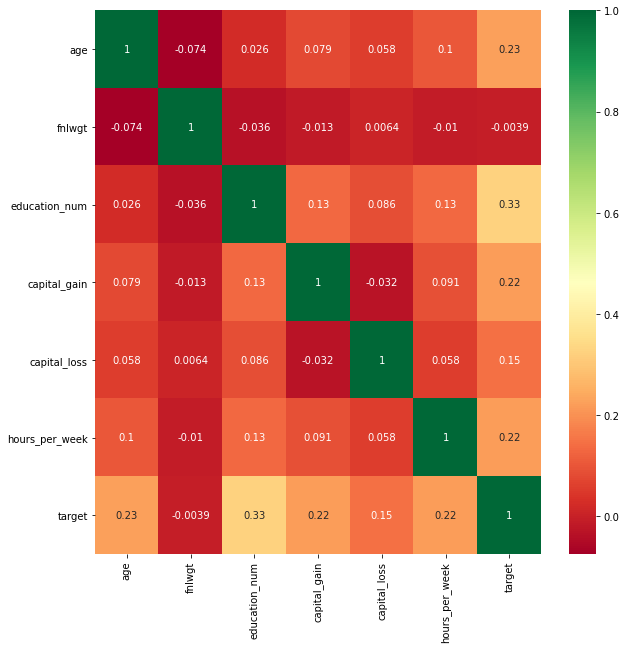

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [23]:
df1 = data.copy()

objectFeature = []
for i in list(df1.columns):
    if (df1[i].dtypes == 'object'):
        objectFeature.append(i)
        

df1=pd.get_dummies(df1[objectFeature[:-1]])

In [24]:
intFeature = []
for i in list(data.columns):
    if (data[i].dtypes == 'int64'):
        intFeature.append(i)

df2 = data[intFeature]


In [25]:

x = pd.concat([df1, df2], axis=1)
x.shape

(15060, 64)

In [26]:
X = x.drop(columns = ['target'])
y = x['target']

In [27]:

y.head()

0    0
1    0
2    1
3    1
5    0
Name: target, dtype: int64

In [28]:
X.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,...,race_ Other,race_ White,sex_ Female,sex_ Male,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,25,226802,7,0,0,40
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,38,89814,9,0,0,50
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,28,336951,12,0,0,40
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,44,160323,10,7688,0,40
5,0,0,1,0,0,0,0,1,0,0,...,0,1,0,1,34,198693,6,0,0,30


In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15060 entries, 0 to 16280
Data columns (total 63 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   workclass_ Federal-gov                 15060 non-null  uint8
 1   workclass_ Local-gov                   15060 non-null  uint8
 2   workclass_ Private                     15060 non-null  uint8
 3   workclass_ Self-emp-inc                15060 non-null  uint8
 4   workclass_ Self-emp-not-inc            15060 non-null  uint8
 5   workclass_ State-gov                   15060 non-null  uint8
 6   workclass_ Without-pay                 15060 non-null  uint8
 7   education_ 10th                        15060 non-null  uint8
 8   education_ 11th                        15060 non-null  uint8
 9   education_ 12th                        15060 non-null  uint8
 10  education_ 1st-4th                     15060 non-null  uint8
 11  education_ 5th-6th          

In [30]:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Y=le.fit_transform(y)
Y

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(X)

In [32]:
scaled_data.shape

(15060, 63)

In [33]:
df=pd.DataFrame(data=scaled_data,columns= X.columns)

In [34]:
df.describe()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,...,race_ Other,race_ White,sex_ Female,sex_ Male,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,1.506000e+04,1.506000e+04,1.506000e+04,1.506000e+04,1.506000e+04,1.506000e+04,1.506000e+04,1.506000e+04,1.506000e+04,1.506000e+04,...,1.506000e+04,1.506000e+04,1.506000e+04,1.506000e+04,1.506000e+04,1.506000e+04,1.506000e+04,1.506000e+04,1.506000e+04,1.506000e+04
mean,6.475822e-16,-8.384101e-16,3.287911e-18,5.894061e-16,-8.144363e-16,-4.567727e-16,-4.802549e-16,1.381881e-15,2.138027e-16,-2.889363e-16,...,3.037577e-16,1.235650e-15,-9.168850e-16,9.168850e-16,2.459373e-16,2.565179e-17,7.519439e-18,-1.014992e-15,-7.571043e-16,1.909200e-16
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,...,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
min,-1.780979e-01,-2.713737e-01,-1.651861e+00,-1.986981e-01,-3.069824e-01,-2.152719e-01,-2.156441e-02,-1.658174e-01,-1.985175e-01,-1.160127e-01,...,-9.037196e-02,-2.491133e+00,-6.958322e-01,-1.437128e+00,-1.626902e+00,-1.667663e+00,-3.561557e+00,-1.454384e-01,-2.191694e-01,-3.312068e+00
25%,-1.780979e-01,-2.713737e-01,-1.651861e+00,-1.986981e-01,-3.069824e-01,-2.152719e-01,-2.156441e-02,-1.658174e-01,-1.985175e-01,-1.160127e-01,...,-9.037196e-02,4.014238e-01,-6.958322e-01,-1.437128e+00,-8.047938e-01,-6.908468e-01,-4.348982e-01,-1.454384e-01,-2.191694e-01,-7.888904e-02
50%,-1.780979e-01,-2.713737e-01,6.053777e-01,-1.986981e-01,-3.069824e-01,-2.152719e-01,-2.156441e-02,-1.658174e-01,-1.985175e-01,-1.160127e-01,...,-9.037196e-02,4.014238e-01,-6.958322e-01,6.958322e-01,-1.321597e-01,-1.104176e-01,-4.406595e-02,-1.454384e-01,-2.191694e-01,-7.888904e-02
75%,-1.780979e-01,-2.713737e-01,6.053777e-01,-1.986981e-01,-3.069824e-01,-2.152719e-01,-2.156441e-02,-1.658174e-01,-1.985175e-01,-1.160127e-01,...,-9.037196e-02,4.014238e-01,1.437128e+00,6.958322e-01,6.899487e-01,4.637031e-01,1.128431e+00,-1.454384e-01,-2.191694e-01,3.356211e-01
max,5.614891e+00,3.684955e+00,6.053777e-01,5.032760e+00,3.257516e+00,4.645289e+00,4.637271e+01,6.030732e+00,5.037339e+00,8.619745e+00,...,1.106538e+01,4.014238e-01,1.437128e+00,6.958322e-01,3.828908e+00,1.231669e+01,2.300928e+00,1.283651e+01,9.060379e+00,4.812331e+00


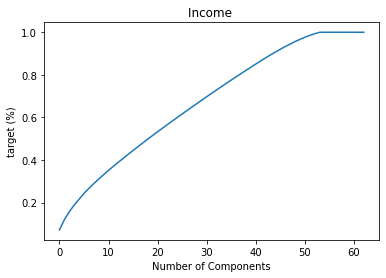

In [35]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(df)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('target (%)') 
plt.title('Income ')
plt.show()

In [36]:
pca = PCA(n_components=46)
new_data = pca.fit_transform(df)
principal_Df = pd.DataFrame(data = new_data, columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5', 'principal component 6','principal component 7','principal component 8','principal component 9', 'principal component 10','principal component 11','principal component 12',
                         'principal component 13', 'principal component 14','principal component 15','principal component 16','principal component 17', 'principal component 18','principal component 19','principal component 20','principal component 21', 'principal component 22','principal component 23','principal component 24',
                         'principal component 25', 'principal component 26','principal component 27','principal component 28','principal component 29', 'principal component 30','principal component 31','principal component 32',
                         'principal component 33', 'principal component 34','principal component 35','principal component 35','principal component 36', 'principal component 37','principal component 38','principal component 39',
                         'principal component 40', 'principal component 41','principal component 42','principal component 43','principal component 44','principal component 45'])

In [37]:
principal_Df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,...,principal component 36,principal component 37,principal component 38,principal component 39,principal component 40,principal component 41,principal component 42,principal component 43,principal component 44,principal component 45
0,-2.248643,-2.972094,-1.283719,3.796312,-0.104588,-0.634224,1.213492,0.270919,-0.178841,0.330592,...,0.216239,0.163455,0.955625,-0.639544,-1.766521,-0.783549,0.775811,-0.292957,0.359722,-0.660166
1,2.248181,-1.721182,0.393574,-0.746903,-0.738012,0.459105,0.407540,0.230574,1.482658,-0.461902,...,0.274471,0.789825,-0.269682,0.787791,0.257713,-0.642991,-0.205100,1.292730,2.964068,0.991410
2,2.275670,0.998266,-0.246527,1.813395,-1.702701,1.614800,-3.131098,-1.673183,-3.058868,-0.973860,...,0.934893,0.732689,0.358317,1.456601,1.482823,-1.285334,-0.756620,0.281463,-0.759215,0.610880
3,1.091818,-1.343283,0.991623,3.165999,1.584732,-1.120154,-0.134482,0.947867,-0.827410,0.788753,...,0.118357,-0.155778,0.472410,-0.829257,-0.462365,-0.560683,-0.273452,-1.023991,0.759006,-1.236028
4,-1.765862,-2.044102,-0.758499,-0.727825,-1.542477,-0.090318,1.632938,-0.088175,-1.548856,-0.483127,...,-1.069691,-0.421858,0.059677,0.781194,-0.464935,-1.013340,-1.236368,0.138946,0.936696,0.921628


In [38]:
principal_Df= principal_Df.loc[:,~principal_Df.columns.duplicated()]

In [39]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(principal_Df,Y,test_size=0.3,random_state=42)

In [40]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost as xgb

In [41]:
model = XGBClassifier(objective='binary:logistic')
model.fit(train_x, train_y)

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:18:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
y_pred = model.predict(train_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(train_y,predictions)
accuracy

0.9870992221589832

In [43]:
y_pred = model.predict(test_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(test_y,predictions)
accuracy

0.8333333333333334

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
param_grid = {
    'learning_rate':[2.5,2.0,1.5,1.0,0.5],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
    }

In [46]:
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid, verbose=3)

In [ ]:
grid.fit(train_x,train_y)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] learning_rate=2.5, max_depth=3, n_estimators=10 .................
[23:18:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  learning_rate=2.5, max_depth=3, n_estimators=10, score=0.808, total=   0.3s
[CV] learning_rate=2.5, max_depth=3, n_estimators=10 .................
[23:18:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  learning_rate=2.5, max_depth=3, n_estimators=10, score=0.750, total=   0.4s
[CV] learning_rate=2.5, max_depth=3, n_estimators=10 .................
[23:18:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  learning_rate=2.5, max_depth=3, n_estimators=10, score=0.754, total=   0.4s
[CV] learning_rate=2.5, max_depth=3, n_estimators=10 .................
[23:18:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=2.5, max_depth=3, n_estimators=10, score=0.779, total=   0.3s
[CV] learning_rate=2.5, max_depth=3, n_estimators=10 .................
[23:18:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=2.5, max_depth=3, n_estimators=10, score=0.243, total=

[CV]  learning_rate=2.5, max_depth=5, n_estimators=10, score=0.757, total=   0.5s
[CV] learning_rate=2.5, max_depth=5, n_estimators=10 .................
[23:18:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=2.5, max_depth=5, n_estimators=10, score=0.370, total=   0.6s
[CV] learning_rate=2.5, max_depth=5, n_estimators=10 .................
[23:18:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=2.5, max_depth=5, n_estimators=10, score=0.648, total=

[CV]  learning_rate=2.5, max_depth=5, n_estimators=200, score=0.751, total=   1.4s
[CV] learning_rate=2.5, max_depth=5, n_estimators=200 ................
[23:19:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=2.5, max_depth=5, n_estimators=200, score=0.764, total=   1.1s
[CV] learning_rate=2.5, max_depth=10, n_estimators=10 ................
[23:19:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=2.5, max_depth=10, n_estimators=10, score=0.728, tot

[CV]  learning_rate=2.5, max_depth=10, n_estimators=200, score=0.753, total=   2.5s
[CV] learning_rate=2.5, max_depth=10, n_estimators=200 ...............
[23:19:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=2.5, max_depth=10, n_estimators=200, score=0.725, total=   3.2s
[CV] learning_rate=2.5, max_depth=10, n_estimators=200 ...............
[23:19:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=2.5, max_depth=10, n_estimators=200, score=0.737, 

[CV]  learning_rate=2.5, max_depth=20, n_estimators=100, score=0.759, total=   4.0s
[CV] learning_rate=2.5, max_depth=20, n_estimators=200 ...............
[23:20:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=2.5, max_depth=20, n_estimators=200, score=0.709, total=   4.2s
[CV] learning_rate=2.5, max_depth=20, n_estimators=200 ...............
[23:20:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=2.5, max_depth=20, n_estimators=200, score=0.761, 

[CV]  learning_rate=2.0, max_depth=3, n_estimators=100, score=0.741, total=   0.8s
[CV] learning_rate=2.0, max_depth=3, n_estimators=100 ................
[23:21:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=2.0, max_depth=3, n_estimators=100, score=0.753, total=   1.8s
[CV] learning_rate=2.0, max_depth=3, n_estimators=100 ................
[23:21:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=2.0, max_depth=3, n_estimators=100, score=0.755, tot

[CV]  learning_rate=2.0, max_depth=5, n_estimators=100, score=0.757, total=   4.6s
[CV] learning_rate=2.0, max_depth=5, n_estimators=100 ................
[23:21:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=2.0, max_depth=5, n_estimators=100, score=0.756, total=   5.0s
[CV] learning_rate=2.0, max_depth=5, n_estimators=100 ................
[23:21:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=2.0, max_depth=5, n_estimators=100, score=0.778, tot

[CV]  learning_rate=2.0, max_depth=10, n_estimators=50, score=0.803, total=   4.0s
[CV] learning_rate=2.0, max_depth=10, n_estimators=50 ................
[23:22:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=2.0, max_depth=10, n_estimators=50, score=0.793, total=   4.7s
[CV] learning_rate=2.0, max_depth=10, n_estimators=100 ...............
[23:22:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=2.0, max_depth=10, n_estimators=100, score=0.800, to

[CV]  learning_rate=2.0, max_depth=20, n_estimators=50, score=0.802, total=   4.1s
[CV] learning_rate=2.0, max_depth=20, n_estimators=50 ................
[23:24:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=2.0, max_depth=20, n_estimators=50, score=0.793, total=   4.1s
[CV] learning_rate=2.0, max_depth=20, n_estimators=50 ................
[23:24:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=2.0, max_depth=20, n_estimators=50, score=0.809, tot

[CV]  learning_rate=1.5, max_depth=3, n_estimators=10, score=0.826, total=   0.4s
[CV] learning_rate=1.5, max_depth=3, n_estimators=50 .................
[23:25:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1.5, max_depth=3, n_estimators=50, score=0.799, total=   2.1s
[CV] learning_rate=1.5, max_depth=3, n_estimators=50 .................
[23:25:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1.5, max_depth=3, n_estimators=50, score=0.819, total=

[CV]  learning_rate=1.5, max_depth=5, n_estimators=10, score=0.792, total=   0.7s
[CV] learning_rate=1.5, max_depth=5, n_estimators=10 .................
[23:27:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1.5, max_depth=5, n_estimators=10, score=0.808, total=   0.7s
[CV] learning_rate=1.5, max_depth=5, n_estimators=10 .................
[23:27:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1.5, max_depth=5, n_estimators=10, score=0.814, total=

[CV]  learning_rate=1.5, max_depth=10, n_estimators=10, score=0.801, total=   1.2s
[CV] learning_rate=1.5, max_depth=10, n_estimators=10 ................
[23:28:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1.5, max_depth=10, n_estimators=10, score=0.806, total=   1.1s
[CV] learning_rate=1.5, max_depth=10, n_estimators=10 ................
[23:28:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1.5, max_depth=10, n_estimators=10, score=0.795, tot

[CV]  learning_rate=1.5, max_depth=10, n_estimators=200, score=0.811, total=  13.0s
[CV] learning_rate=1.5, max_depth=10, n_estimators=200 ...............
[23:30:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1.5, max_depth=10, n_estimators=200, score=0.811, total=  14.3s
[CV] learning_rate=1.5, max_depth=20, n_estimators=10 ................
[23:30:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1.5, max_depth=20, n_estimators=10, score=0.794, t

[CV]  learning_rate=1.5, max_depth=20, n_estimators=200, score=0.808, total=  17.5s
[CV] learning_rate=1.5, max_depth=20, n_estimators=200 ...............
[23:33:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1.5, max_depth=20, n_estimators=200, score=0.806, total=  17.9s
[CV] learning_rate=1.5, max_depth=20, n_estimators=200 ...............
[23:33:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1.5, max_depth=20, n_estimators=200, score=0.818, 

[CV]  learning_rate=1.0, max_depth=3, n_estimators=100, score=0.817, total=   5.2s
[CV] learning_rate=1.0, max_depth=3, n_estimators=200 ................
[23:34:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1.0, max_depth=3, n_estimators=200, score=0.805, total=  10.5s
[CV] learning_rate=1.0, max_depth=3, n_estimators=200 ................
[23:35:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1.0, max_depth=3, n_estimators=200, score=0.819, tot

[CV]  learning_rate=1.0, max_depth=5, n_estimators=100, score=0.808, total=   8.5s
[CV] learning_rate=1.0, max_depth=5, n_estimators=100 ................
[23:36:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1.0, max_depth=5, n_estimators=100, score=0.819, total=   7.8s
[CV] learning_rate=1.0, max_depth=5, n_estimators=100 ................
[23:36:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1.0, max_depth=5, n_estimators=100, score=0.820, tot

[CV]  learning_rate=1.0, max_depth=10, n_estimators=100, score=0.804, total=  11.0s
[CV] learning_rate=1.0, max_depth=10, n_estimators=100 ...............
[23:38:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1.0, max_depth=10, n_estimators=100, score=0.823, total=  10.4s
[CV] learning_rate=1.0, max_depth=10, n_estimators=100 ...............
[23:39:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1.0, max_depth=10, n_estimators=100, score=0.813, 

[CV]  learning_rate=1.0, max_depth=20, n_estimators=50, score=0.816, total=   7.1s
[CV] learning_rate=1.0, max_depth=20, n_estimators=50 ................
[23:41:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1.0, max_depth=20, n_estimators=50, score=0.815, total=   6.9s
[CV] learning_rate=1.0, max_depth=20, n_estimators=100 ...............
[23:41:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1.0, max_depth=20, n_estimators=100, score=0.807, to

[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.836, total=   2.4s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[23:44:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.843, total=   2.2s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[23:44:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.838, total=

[CV]  learning_rate=0.5, max_depth=5, n_estimators=10, score=0.832, total=   0.8s
[CV] learning_rate=0.5, max_depth=5, n_estimators=50 .................
[23:45:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.5, max_depth=5, n_estimators=50, score=0.815, total=   4.7s
[CV] learning_rate=0.5, max_depth=5, n_estimators=50 .................
[23:46:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.5, max_depth=5, n_estimators=50, score=0.825, total=

[CV]  learning_rate=0.5, max_depth=10, n_estimators=10, score=0.816, total=   1.8s
[CV] learning_rate=0.5, max_depth=10, n_estimators=10 ................
[23:48:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.5, max_depth=10, n_estimators=10, score=0.827, total=   1.2s
[CV] learning_rate=0.5, max_depth=10, n_estimators=10 ................
[23:48:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.5, max_depth=10, n_estimators=10, score=0.815, tot

[CV]  learning_rate=0.5, max_depth=20, n_estimators=10, score=0.806, total=   1.7s
[CV] learning_rate=0.5, max_depth=20, n_estimators=10 ................
[23:51:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.5, max_depth=20, n_estimators=10, score=0.825, total=   1.6s
[CV] learning_rate=0.5, max_depth=20, n_estimators=10 ................
[23:51:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.5, max_depth=20, n_estimators=10, score=0.810, tot

In [ ]:
grid.best_params_

In [ ]:
new_model=XGBClassifier(learning_rate= 0.5, max_depth= 3, n_estimators= 50)
new_model.fit(train_x, train_y)

In [ ]:
y_pred_new = new_model.predict(test_x)
predictions_new = [round(value) for value in y_pred_new]
accuracy_new = accuracy_score(test_y,predictions_new)
accuracy_new

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_y, y_pred_new))

In [ ]:
import scikitplot
scikitplot.metrics.plot_confusion_matrix(test_y,y_pred_new)

In [ ]:
features_contribution = pd.Series(new_model.get_fscore()).sort_values(ascending=False)

In [ ]:
plt.figure(figsize=(20,10))
features_contribution[:50].plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()

In [ ]:
filename = 'xgboost_model.pickle'
pickle.dump(new_model, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
filename_scaler = 'scaler_model.pickle'
pickle.dump(scaler, open(filename_scaler, 'wb'))

scaler_model = pickle.load(open(filename_scaler, 'rb'))